## Creating a Monthly Mean from the T2m Data. From Daily to Monthly


In [2]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd
import netCDF4 as nc

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

import matplotlib as mpl
from matplotlib import cm
import matplotlib.cbook as cbook
import matplotlib.colors as colors

import time
import warnings


import scipy.stats

warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
#opening t2m era interim dataset

file = "/scratch/kbarrag/clim680_dataset/mean/t2m/erai.T2m.day.mean.1979-2019.nc"
ds1 = xr.open_dataset(file)
ds1

<xarray.Dataset>
Dimensions:  (lon: 480, lat: 200, time: 14853)
Coordinates:
  * lon      (lon) float64 0.0 0.75 1.5 2.25 3.0 ... 357.0 357.8 358.5 359.2
  * lat      (lat) float64 -59.25 -58.5 -57.75 -57.0 ... 87.75 88.5 89.25 90.0
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2019-08-31
Data variables:
    t2m      (time, lat, lon) float32 ...

In [4]:
#Selecting the location on the map that we are interested in: North America

ds = ds1.sel(lon=slice(360-180,360-0))
ds

<xarray.Dataset>
Dimensions:  (lon: 240, lat: 200, time: 14853)
Coordinates:
  * lon      (lon) float64 180.0 180.8 181.5 182.2 ... 357.0 357.8 358.5 359.2
  * lat      (lat) float64 -59.25 -58.5 -57.75 -57.0 ... 87.75 88.5 89.25 90.0
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2019-08-31
Data variables:
    t2m      (time, lat, lon) float32 ...

In [5]:
# Since the dataset we have is daily data using resample
#Create a monthly mean for every month of the daily data :|

t2m_monthly = ds.resample(time='M').mean(dim='time')
t2m_monthly

<xarray.Dataset>
Dimensions:  (lon: 240, lat: 200, time: 488)
Coordinates:
  * lon      (lon) float64 180.0 180.8 181.5 182.2 ... 357.0 357.8 358.5 359.2
  * lat      (lat) float64 -59.25 -58.5 -57.75 -57.0 ... 87.75 88.5 89.25 90.0
  * time     (time) datetime64[ns] 1979-01-31 1979-02-28 ... 2019-08-31
Data variables:
    t2m      (time, lat, lon) float32 278.5 278.5 278.4 ... 273.3 273.3 273.3

In [8]:
#Creating a climatology based on the month and turning it into a data array minus 272 to go from k to c

da_monthly_climo=t2m_monthly.t2m.groupby("time.month").mean()- 272

da_monthly_climo

<xarray.DataArray 't2m' (month: 12, lat: 200, lon: 240)>
array([[[  6.199005  ,   6.140686  ,   6.0928345 , ...,   1.1926575 ,
           1.2080078 ,   1.22229   ],
        [  6.7428284 ,   6.7213135 ,   6.6977844 , ...,   1.3190918 ,
           1.3229675 ,   1.3283081 ],
        [  7.251709  ,   7.259796  ,   7.261017  , ...,   1.4640198 ,
           1.4610901 ,   1.4596863 ],
        ...,
        [-25.871048  , -25.877304  , -25.883667  , ..., -25.518509  ,
         -25.509384  , -25.500305  ],
        [-25.922638  , -25.92566   , -25.92862   , ..., -25.758316  ,
         -25.755142  , -25.75203   ],
        [-25.834991  , -25.834991  , -25.834991  , ..., -25.834991  ,
         -25.834991  , -25.834991  ]],

       [[  6.449585  ,   6.390045  ,   6.3415527 , ...,   1.6434631 ,
           1.6524048 ,   1.6606445 ],
        [  6.9918213 ,   6.9610596 ,   6.932007  , ...,   1.7599792 ,
           1.7608337 ,   1.7641602 ],
        [  7.495819  ,   7.4970093 ,   7.4941406 , ...,   1.8948059 ,
           1.8907776 ,   1.8901062 ],
...
        [-20.791336  , -20.800201  , -20.809036  , ..., -21.08516   ,
         -21.074677  , -21.064285  ],
        [-20.958038  , -20.963058  , -20.968063  , ..., -21.152878  ,
         -21.148956  , -21.14505   ],
        [-21.040771  , -21.040771  , -21.040771  , ..., -21.040771  ,
         -21.040771  , -21.040771  ]],

       [[  5.270355  ,   5.2120056 ,   5.1638184 , ...,   0.36987305,
           0.36993408,   0.36572266],
        [  5.8349    ,   5.8166504 ,   5.7963257 , ...,   0.5043335 ,
           0.50219727,   0.49691772],
        [  6.3604126 ,   6.378418  ,   6.389282  , ...,   0.65075684,
           0.65167236,   0.64923096],
        ...,
        [-24.188034  , -24.194138  , -24.200241  , ..., -23.879227  ,
         -23.871552  , -23.863892  ],
        [-24.185257  , -24.1884    , -24.19162   , ..., -24.05217   ,
         -24.049973  , -24.04773   ],
        [-24.111664  , -24.111664  , -24.111664  , ..., -24.111664  ,
         -24.111664  , -24.111664  ]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 180.0 180.8 181.5 182.2 ... 357.0 357.8 358.5 359.2
  * lat      (lat) float64 -59.25 -58.5 -57.75 -57.0 ... 87.75 88.5 89.25 90.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

Text(0.5, 0.98, '2 Meter Temperature Monthly Mean Climatology ')

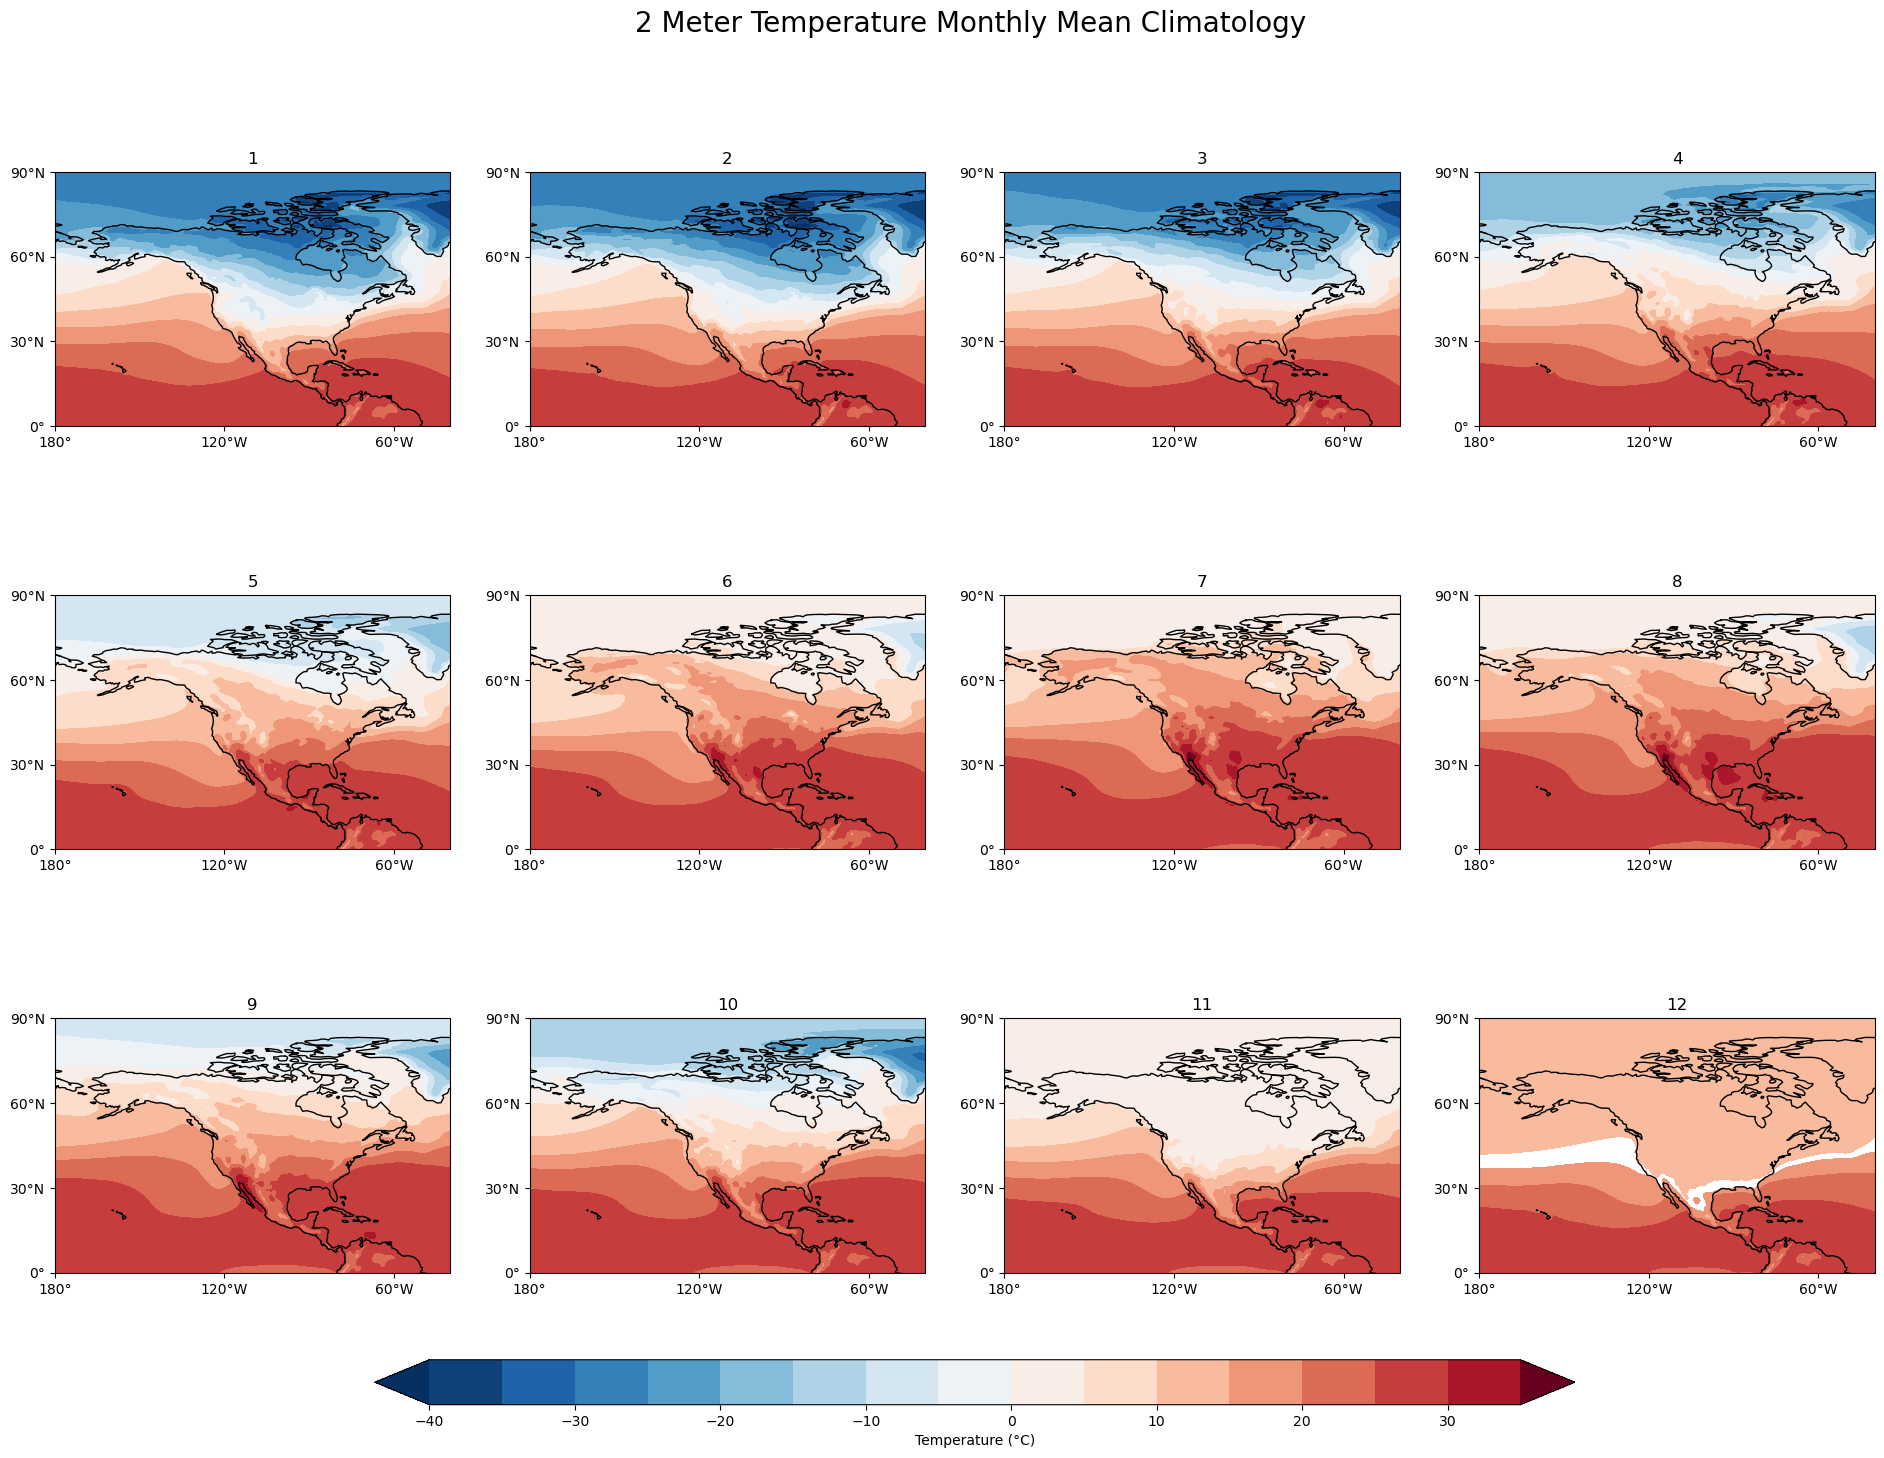

In [10]:
#Plotting the climotology to make sure its going ok. Plot not perfect in color. Does not show pattern. 

#Define the figure and each axis for the 2 rows and 2 columns
fig, axs = plt.subplots(nrows=3,ncols=4,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(20,15))



min_z500= da_monthly_climo.min()
max_z500= da_monthly_climo.max()
levels = np.arange(min_z500,max_z500,500)


clevs = np.arange(-40,40,5)
divnorm = mpl.colors.CenteredNorm(vcenter=0)
# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i,month in enumerate(da_monthly_climo['month']):

        # Select the season
        data=da_monthly_climo.sel(month=month)

        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=da_monthly_climo['lon'])

        # Contour plot
        cs=axs[i].contourf(lons,
                           da_monthly_climo['lat'],
                           data,
                           clevs,
                           norm=divnorm,
                          transform = ccrs.PlateCarree(),
                          cmap='RdBu_r',
                           extend='both')

       # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)
         # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        

        # Title each subplot with the name of the model
        axs[i].set_title(month.values)
    
        # Draw the coastines for each subplot
        axs[i].coastlines()
        axs[i].set_extent([-180, -40, 90, 0], ccrs.PlateCarree())        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(top=0.9, left=0.04, right=0.95,
                    wspace=0.2, hspace=0.25)

#Colorbar(location, how far to bottom, how long,how tall
cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.03])
# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='Temperature (°C)')

# Add a big title at the top
plt.suptitle('2 Meter Temperature Monthly Mean Climatology ',fontsize=20)